In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
zip_file_path = '../extracted_data/feature_extracted_data/trainingData_features.zip'

# Load the data from the zip file
feature_df = pd.read_csv(zip_file_path, compression='zip')

# Display the first few rows of the DataFrame to confirm it has been loaded correctly
print(feature_df.head())


   AN311_window_1_mean  AN311_window_1_std  AN311_window_1_min  \
0             3.392500            0.139142                 3.2   
1             3.372500            0.099132                 3.2   
2             3.356667            0.121610                 3.2   
3             3.380833            0.130573                 3.2   
4             3.355000            0.125731                 3.1   

   AN311_window_1_max  AN311_window_2_mean  AN311_window_2_std  \
0                 3.7             3.356667            0.121610   
1                 3.7             3.380833            0.130573   
2                 3.6             3.355000            0.125731   
3                 3.6             3.392500            0.152295   
4                 3.5             3.402500            0.145179   

   AN311_window_2_min  AN311_window_2_max  AN311_window_3_mean  \
0                 3.2                 3.6             3.355000   
1                 3.2                 3.6             3.392500   
2       

In [5]:
feature_df.shape

(51700, 560)

In [7]:
full_df_zip_file_path = '../extracted_data/trainingDataFull.zip'

# Load the data from the zip file
full_df = pd.read_csv(full_df_zip_file_path, compression='zip')

TypeError: 'tuple' object is not callable

In [11]:
# Display the first few rows of the DataFrame to confirm it has been loaded correctly
print(full_df.shape)

(51700, 16803)


In [23]:
# Extract the specific columns from full_df
selected_columns = full_df[['MM263', 'MM264', 'MM256']]

# Concatenate the selected columns with feature_df along the columns (axis=1)
combined_df = pd.concat([feature_df, selected_columns], axis=1)

In [25]:
combined_df.shape

(51700, 563)

In [33]:
combined_df['MM263'] = combined_df['MM263'].replace({'normal': 0, 'warning': 1})
combined_df['MM264'] = combined_df['MM264'].replace({'normal': 0, 'warning': 1})
combined_df['MM256'] = combined_df['MM256'].replace({'normal': 0, 'warning': 1})

/var/folders/ph/mqs9kl656hv6_7dcqk4stw900000gn/T/ipykernel_3702/3275675191.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['MM263'] = combined_df['MM263'].replace({'normal': 0, 'warning': 1})
/var/folders/ph/mqs9kl656hv6_7dcqk4stw900000gn/T/ipykernel_3702/3275675191.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['MM264'] = combined_df['MM264'].replace({'normal': 0, 'warning': 1})
/var/folders/ph/mqs9kl656hv6_7dcqk4stw900000gn/T/ipykernel_3702/3275675191.py:3: FutureWarning: Downcasting behavior in 

In [35]:
combined_df.head()

,AN311_window_1_mean,AN311_window_1_std,AN311_window_1_min,AN311_window_1_max,AN311_window_2_mean,AN311_window_2_std,AN311_window_2_min,AN311_window_2_max,AN311_window_3_mean,AN311_window_3_std,...,V_window_4_std,V_window_4_min,V_window_4_max,V_window_5_mean,V_window_5_std,V_window_5_min,V_window_5_max,MM263,MM264,MM256
0,3.392500,0.139142,3.2,3.7,3.356667,0.121610,3.2,3.6,3.355000,0.125731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,3.372500,0.099132,3.2,3.7,3.380833,0.130573,3.2,3.6,3.392500,0.152295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,3.356667,0.121610,3.2,3.6,3.355000,0.125731,3.1,3.5,3.402500,0.145179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,3.380833,0.130573,3.2,3.6,3.392500,0.152295,3.1,3.7,3.345833,0.117541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,3.355000,0.125731,3.1,3.5,3.402500,0.145179,3.2,3.7,3.350833,0.116187,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [37]:
# Save the combined DataFrame into a compressed zip file
output_zip_path = '../extracted_data/combined_featured_data.zip'
combined_df.to_csv(output_zip_path, index=False, compression='zip')

print(f"Combined DataFrame shape: {combined_df.shape}")

Combined DataFrame shape: (51700, 563)


In [39]:
# feature_df = pd.read_csv('../extracted_data/feature_extracted_data/trainingData1.csv')
correlation_matrix = combined_df.corr()

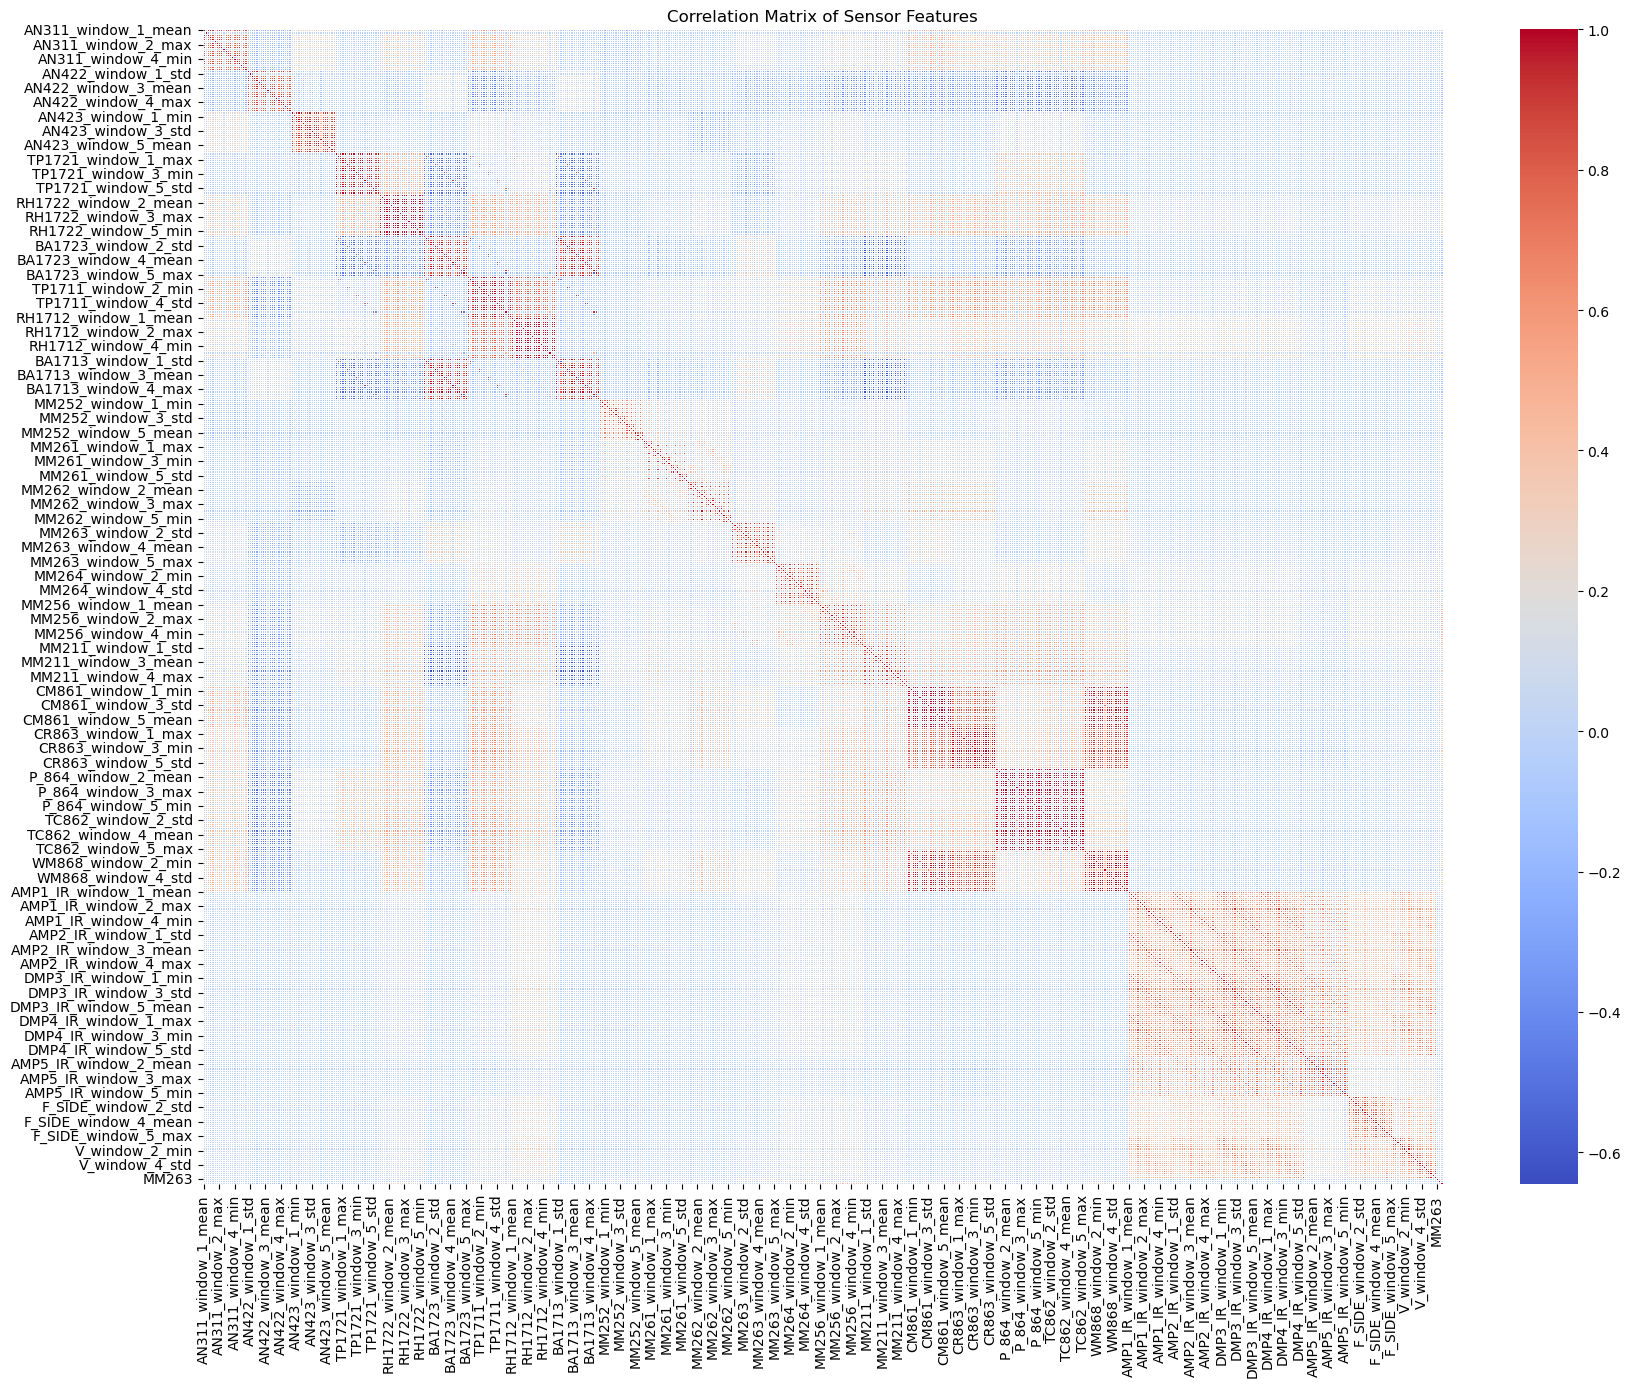

In [41]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap = 'coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Sensor Features')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


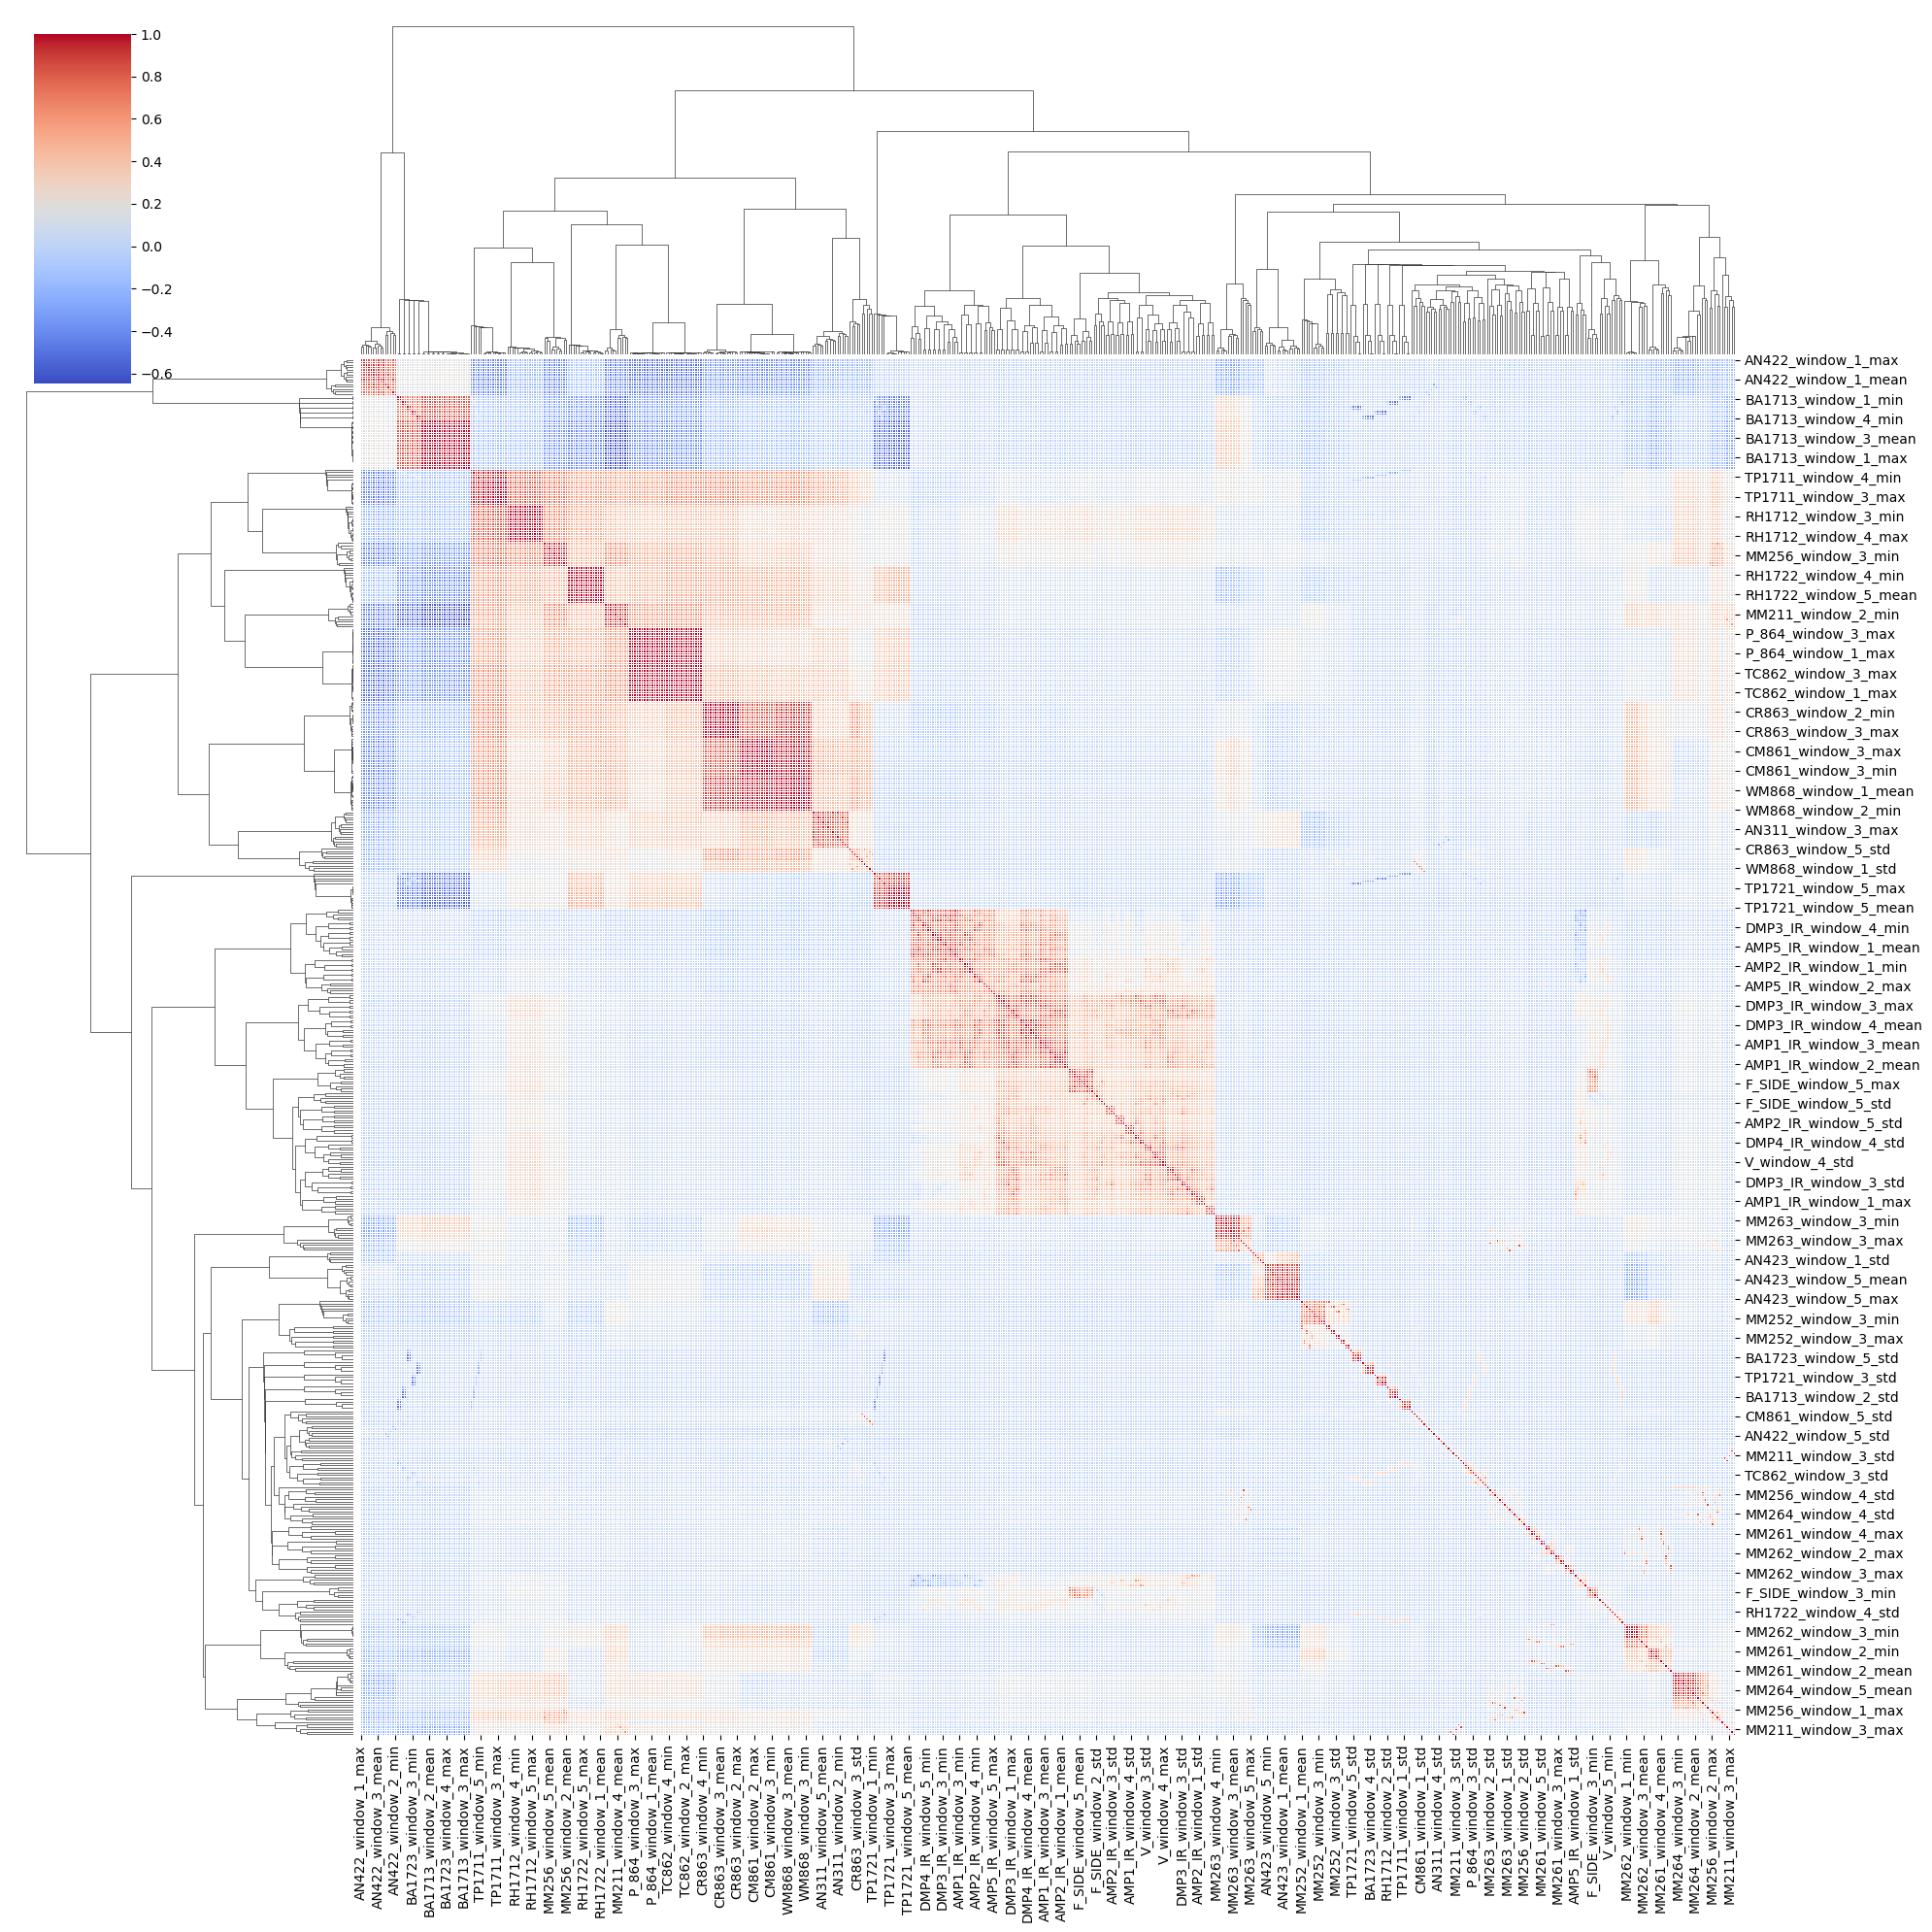

In [45]:
# Removing columns with more than 10% missing values
threshold = correlation_matrix.shape[0] * 0.1
correlation_matrix.dropna(thresh=threshold, axis=1, inplace=True)

# Removing rows with any NaN values
correlation_matrix.dropna(axis=0, inplace=True)

# Retry the clustermap
sns.clustermap(correlation_matrix, figsize=(20, 20), cmap='coolwarm',
               linewidths=.5, cbar_pos=(0.02, 0.8, 0.05, 0.18))
plt.show()
